In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns

% matplotlib inline
%load_ext autoreload
% autoreload

In [2]:
data= pd.read_csv('/data/Good data storage.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15",18,1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32",35,1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [3]:
data[data['Protocol']==1].count()

File name              9
Age                    9
Pip number             9
E-I                    9
Reci                   9
Artifact               9
IS100                  9
Trial number before    9
Trial number after     9
Protocol               9
Elimi                  9
Notes                  1
Ptl_note               9
dtype: int64

In [4]:
data_pre_50Hz_reci = data[(data['Ptl_note']=='50Hz IE preonly')]
data_pre_50Hz_uni = data[(data['Ptl_note']=='50Hz IE preonly')&(data['Reci']==0)]
data_pre_50Hz = data[data['Ptl_note']=='50Hz IE preonly']

In [5]:
data_pre_50Hz_reci

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15",18,1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32",35,1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly
5,2017021501,30,1,0,1,1,2,"12,13,14","17,18",1,0,NaN,50Hz IE preonly
6,2016092601,26,1,0,1,1,1,"13,14","16,17,18,19",1,6,NaN,50Hz IE preonly
7,2016091502,25,2,0,1,0,1,3,"6,7",1,3,NaN,50Hz IE preonly
8,2017052201,33,1,0,1,0,1,14,"16,17",1,0,NaN,50Hz IE preonly


In [6]:
data_pre_50Hz_uni

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15",18,1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32",35,1,0,"No change, good data",50Hz IE preonly


In [7]:
data_pre_50Hz

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15",18,1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32",35,1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly
5,2017021501,30,1,0,1,1,2,"12,13,14","17,18",1,0,NaN,50Hz IE preonly
6,2016092601,26,1,0,1,1,1,"13,14","16,17,18,19",1,6,NaN,50Hz IE preonly
7,2016091502,25,2,0,1,0,1,3,"6,7",1,3,NaN,50Hz IE preonly
8,2017052201,33,1,0,1,0,1,14,"16,17",1,0,NaN,50Hz IE preonly


<Container object of 3 artists>

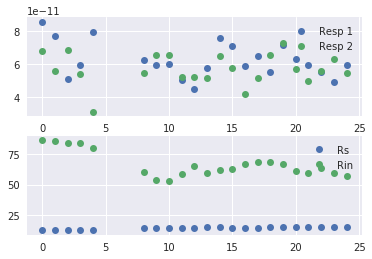

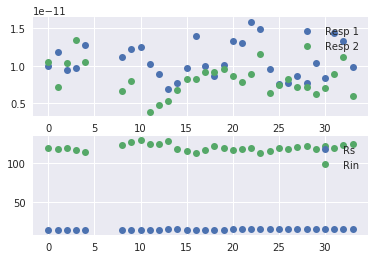

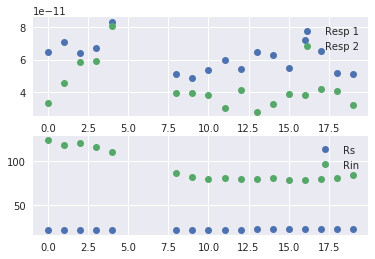

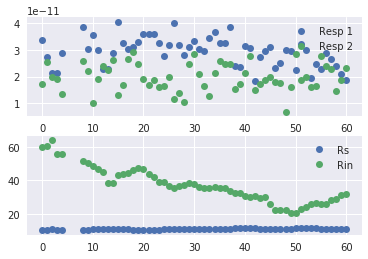

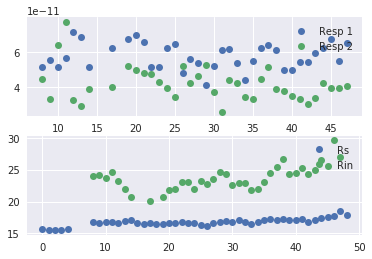

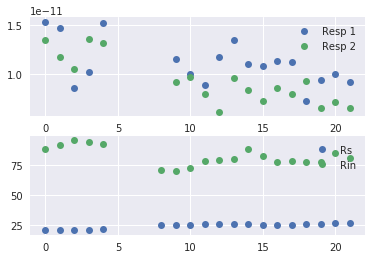

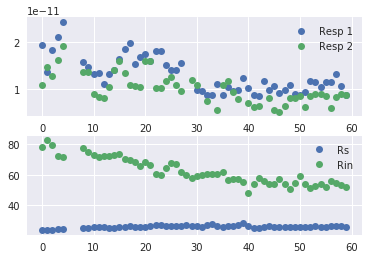

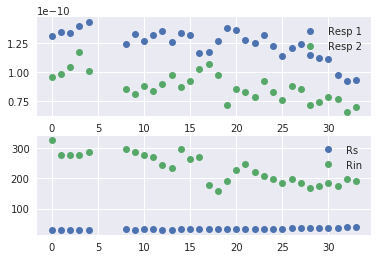

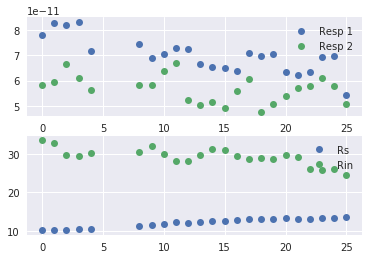

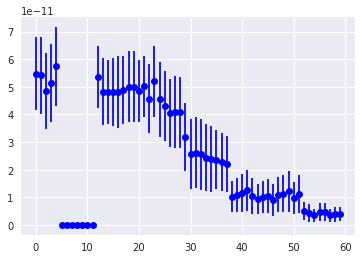

In [8]:
patch_pip.df_ana(data_pre_50Hz_reci,'/data/data_pre_IE50Hz_reci')
pre_50Hz_reci = pd.read_pickle('/data/data_pre_IE50Hz_reci')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(pre_50Hz_reci)
plt.figure()
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [9]:
elimi = np.array([45,12,17.5,33,50,45,32,20,30])
elimi_sr = pd.Series(elimi, index=pre_50Hz_reci.index)
pre_50Hz_reci['elimi']=elimi_sr
pre_50Hz_reci.to_pickle('/data/ana_pre_IE50Hz_reci')

<Container object of 3 artists>

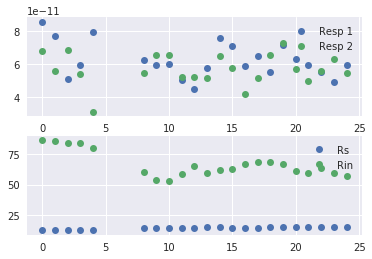

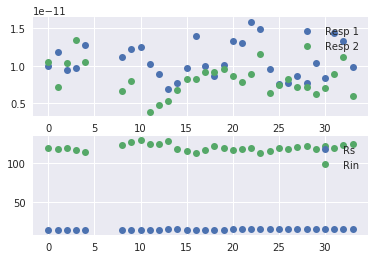

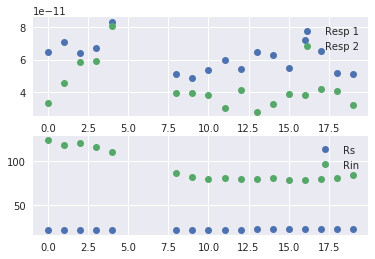

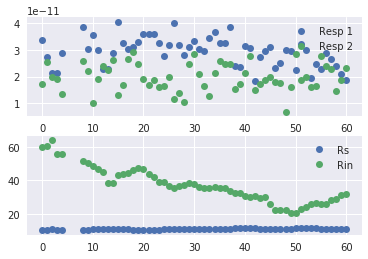

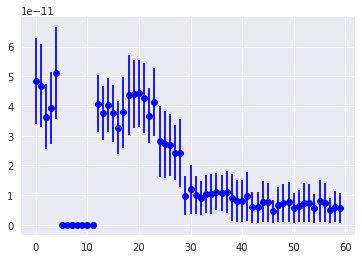

In [10]:
patch_pip.df_ana(data_pre_50Hz_uni ,'/data/data_pre_IE50Hz_uni')
pre_50Hz_uni  = pd.read_pickle('/data/data_pre_IE50Hz_uni')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(pre_50Hz_uni )
plt.figure()
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [11]:
elimi = np.array([50,32,30,50])
elimi_sr = pd.Series(elimi, index=pre_50Hz_uni.index)
pre_50Hz_uni['elimi']=elimi_sr
pre_50Hz_uni.to_pickle('/data/ana_pre_IE50Hz_uni')

<Container object of 3 artists>

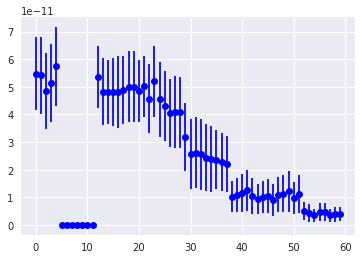

In [12]:
patch_pip.df_ana(data_pre_50Hz ,'/data/data_IE50Hz_uni')
pre_50Hz  = pd.read_pickle('/data/data_IE50Hz_uni')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(pre_50Hz, iffigure=False)
plt.figure()
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [13]:
# post_50Hz = pd.concat([pre_50Hz_uni, pre_50Hz_reci], axis=0)
# post_50Hz.to_pickle('/data/ana_pre_IE50Hz')